<a href="https://colab.research.google.com/github/GRUPO3TFM/TFM/blob/main/Modelo_KNN_Retrasos%20y%20cancelaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargado de Archivos de Clima, Trenes y Preprocesado

### 1. Cargamos desde nuestro entorno local todos los archivos de lluvias, temperaturas y viento al Colab.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Extreme_wind_Leipzig_02928.txt to Extreme_wind_Leipzig_02928.txt
Saving temperature_Wuppertal_05717.txt to temperature_Wuppertal_05717.txt
Saving temperature_Stuttgart_04928.txt to temperature_Stuttgart_04928.txt
Saving temperature_Nürnberg_03668.txt to temperature_Nürnberg_03668.txt
Saving temperature_Münster(Westf)_01766.txt to temperature_Münster(Westf)_01766.txt
Saving temperature_Munchen_03379.txt to temperature_Munchen_03379.txt
Saving temperature_Leipzig_02928.txt to temperature_Leipzig_02928.txt
Saving temperature_Koln_02968.txt to temperature_Koln_02968.txt
Saving temperature_Hannover_02014.txt to temperature_Hannover_02014.txt
Saving temperature_Hamburg_01975.txt to temperature_Hamburg_01975.txt
Saving temperature_Frankfurt_am_Main_01420.txt to temperature_Frankfurt_am_Main_01420.txt
Saving temperature_Essen_01303.txt to temperature_Essen_01303.txt
Saving temperature_Düsseldorf_01078.txt to temperature_Düsseldorf_01078.txt
Saving temperature_Duisburg_13670.txt to tempe

### 2. Limpiamos y Preprocesamos Dataframe Lluvias por hora y ciudad.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os
import numpy as np

In [3]:
uploaded_files = glob.glob("/content/Precipitacion_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'R1', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'R1': 'lluvia_mm'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    rain_data = pd.concat(dataframes, ignore_index=True)
    display(rain_data.head())
    display(rain_data.describe())
    distinct_cities = rain_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,lluvia_mm,city
0,2024-07-07 00:00:00,0.0,Münster(Westf)
1,2024-07-07 01:00:00,0.0,Münster(Westf)
2,2024-07-07 02:00:00,0.0,Münster(Westf)
3,2024-07-07 03:00:00,0.0,Münster(Westf)
4,2024-07-07 04:00:00,0.0,Münster(Westf)


,datetime,lluvia_mm
count,27367,27367.000000
mean,2024-08-04 11:40:33.061716736,-0.047758
min,2024-07-07 00:00:00,-999.000000
25%,2024-07-21 06:00:00,0.000000
50%,2024-08-04 12:00:00,0.000000
75%,2024-08-18 18:00:00,0.000000
max,2024-09-02 06:00:00,29.400000
std,NaN,12.103026


array(['Münster(Westf)', 'Nürnberg', 'Hannover', 'Bonn', 'Bielefeld',
       'Frankfurt_am_Main', 'Bochum', 'Dresden', 'Essen', 'Duisburg',
       'Dortmund', 'Stuttgart', 'Düsseldorf', 'Koln', 'Bremen', 'Leipzig',
       'Berlin', 'Hamburg', 'Wuppertal', 'Munchen'], dtype=object)

### 3. Limpiamos y Preprocesamos Dataframe Vientos por hora y ciudad.

In [4]:
uploaded_files = glob.glob("/content/Extreme_wind_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[2:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'FX_911', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'FX_911': 'windspeed_mps'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    wind_data = pd.concat(dataframes, ignore_index=True)
    display(wind_data.head())
    display(wind_data.describe())
    distinct_cities = wind_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,windspeed_mps,city
0,2024-07-07 00:00:00,10.4,Bielefeld
1,2024-07-07 01:00:00,8.5,Bielefeld
2,2024-07-07 02:00:00,7.4,Bielefeld
3,2024-07-07 03:00:00,5.1,Bielefeld
4,2024-07-07 04:00:00,2.9,Bielefeld


,datetime,windspeed_mps
count,27315,27315.000000
mean,2024-08-04 15:36:18.187809024,5.341739
min,2024-07-07 00:00:00,-999.000000
25%,2024-07-21 10:00:00,3.400000
50%,2024-08-04 16:00:00,5.100000
75%,2024-08-18 22:00:00,7.200000
max,2024-09-04 23:00:00,28.000000
std,NaN,15.172770


array(['Bielefeld', 'Stuttgart', 'Bonn', 'Nürnberg', 'Dortmund',
       'Münster(Westf)', 'Koln', 'Bochum', 'Dresden', 'Duisburg',
       'Bremen', 'Leipzig', 'Düsseldorf', 'Wuppertal', 'Hannover',
       'Munchen', 'Frankfurt_am_Main', 'Berlin', 'Hamburg', 'Essen'],
      dtype=object)

### 4. Limpiamos y Preprocesamos Dataframe para Temperaturas por hora y ciudad.

In [5]:
uploaded_files = glob.glob("/content/temperature_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])  # Ajuste para extraer correctamente el nombre de la ciudad
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        required_columns = ['TX_10', 'TX5_10', 'TN_10', 'TN5_10']
        if all(col in df.columns for col in required_columns):
            df = df[['MESS_DATUM', 'TX_10', 'TX5_10', 'TN_10', 'TN5_10', 'city']]
            df.rename(columns={
                'MESS_DATUM': 'datetime',
                'TX_10': 'max_temp_2m_C',
                'TX5_10': 'max_temp_5cm_C',
                'TN_10': 'min_temp_2m_C',
                'TN5_10': 'min_temp_5cm_C'
            }, inplace=True)
            df.replace(-999, np.nan, inplace=True)

            df_num = df.drop(columns=['city'])
            df_num.set_index('datetime', inplace=True)
            df_num = df_num.resample('H').mean().reset_index()
            df_num['city'] = city

            dataframes.append(df_num)
        else:
            print(f"El archivo {file_path} no contiene las columnas necesarias y será omitido.")
    except Exception as e:
        print(f"Error al procesar el archivo {file_path}: {e}")

if dataframes:
    temp_data = pd.concat(dataframes, ignore_index=True)
    display(temp_data.head())
    display(temp_data.describe())
    distinct_cities = temp_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C,city
0,2024-07-07 00:00:00,11.766667,NaN,11.283333,8.950000,Bonn
1,2024-07-07 01:00:00,11.400000,NaN,10.883333,8.850000,Bonn
2,2024-07-07 02:00:00,10.800000,NaN,10.300000,8.416667,Bonn
3,2024-07-07 03:00:00,10.433333,NaN,9.850000,8.066667,Bonn
4,2024-07-07 04:00:00,9.833333,NaN,9.050000,7.600000,Bonn


,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C
count,27366,27359.000000,0.0,27359.000000,27359.000000
mean,2024-08-04 11:39:02.249506816,20.453356,NaN,20.073360,20.390607
min,2024-07-07 00:00:00,5.733333,NaN,5.616667,4.183333
25%,2024-07-21 06:00:00,17.250000,NaN,16.983333,16.100000
50%,2024-08-04 12:00:00,20.066667,NaN,19.716667,19.550000
75%,2024-08-18 18:00:00,23.366667,NaN,22.866667,24.350000
max,2024-09-02 05:00:00,35.233333,NaN,34.483333,40.650000
std,NaN,4.556421,NaN,4.458144,5.958944


array(['Bonn', 'Bochum', 'Frankfurt_am_Main', 'Duisburg', 'Dresden',
       'Bielefeld', 'Nürnberg', 'Bremen', 'Wuppertal', 'Düsseldorf',
       'Münster(Westf)', 'Dortmund', 'Koln', 'Hamburg', 'Hannover',
       'Stuttgart', 'Munchen', 'Berlin', 'Leipzig', 'Essen'], dtype=object)

### 5. Estandarizamos los nombres de las diversas ciudades en los dataframes para que matcheen a aquellas en BigQuery

In [6]:
city_mapping = {

    'Münster(Westf)Hbf': 'Münster(Westf)',
    # Add other mappings as needed
}

In [7]:
hbf_mapping = {
    'Düsseldorf Hbf': 'Düsseldorf',
    'Dortmund Hbf': 'Dortmund',
    'Hamburg Hbf': 'Hamburg',
    'Köln Hbf': 'Koln',
    'Frankfurt(Main)Hbf': 'Frankfurt_am_Main',
    'Hannover Hbf': 'Hannover',
    'Berlin Hbf': 'Berlin',
    'Bremen Hbf': 'Bremen',
    'Nürnberg Hbf': 'Nürnberg',
    'Bochum Hbf': 'Bochum',
    'Wuppertal Hbf': 'Wuppertal',
    'Bonn Hbf': 'Bonn',
    'Leipzig Hbf': 'Leipzig',
    'Bielefeld Hbf': 'Bielefeld',
    'Stuttgart Hbf': 'Stuttgart',
    'Essen Hbf': 'Essen',
    'Duisburg Hbf': 'Duisburg',
    'Münich Hbf': 'Munchen',
    'Münster(Westf)Hbf': 'Münster(Westf)',
    'Dresden Hbf': 'Dresden'
}

def normalize_city_names(city_series):
    reverse_mapping = {v: k for k, v in hbf_mapping.items()}
    return city_series.map(reverse_mapping).fillna(city_series)

for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

rain_data['city'] = normalize_city_names(rain_data['city'])
wind_data['city'] = normalize_city_names(wind_data['city'])
temp_data['city'] = normalize_city_names(temp_data['city'])

print("Rain Data Normalized:")
print(rain_data.head())
print("\nWind Data Normalized:")
print(wind_data.head())
print("\nTemp Data Normalized:")
print(temp_data.head())

Rain Data Normalized:
             datetime  lluvia_mm               city
0 2024-07-07 00:00:00        0.0  Münster(Westf)Hbf
1 2024-07-07 01:00:00        0.0  Münster(Westf)Hbf
2 2024-07-07 02:00:00        0.0  Münster(Westf)Hbf
3 2024-07-07 03:00:00        0.0  Münster(Westf)Hbf
4 2024-07-07 04:00:00        0.0  Münster(Westf)Hbf

Wind Data Normalized:
             datetime  windspeed_mps           city
0 2024-07-07 00:00:00           10.4  Bielefeld Hbf
1 2024-07-07 01:00:00            8.5  Bielefeld Hbf
2 2024-07-07 02:00:00            7.4  Bielefeld Hbf
3 2024-07-07 03:00:00            5.1  Bielefeld Hbf
4 2024-07-07 04:00:00            2.9  Bielefeld Hbf

Temp Data Normalized:
             datetime  max_temp_2m_C  max_temp_5cm_C  min_temp_2m_C  \
0 2024-07-07 00:00:00      11.766667             NaN      11.283333   
1 2024-07-07 01:00:00      11.400000             NaN      10.883333   
2 2024-07-07 02:00:00      10.800000             NaN      10.300000   
3 2024-07-07 03:00:00   

### 6. Importamos los datos de trenes desde BigQuery, filtrando para los dias que tenemos datos de Clima (desde el 7 de Julio hasta el 01 de Septiembre 2024).

In [8]:
from google.colab import auth
auth.authenticate_user()

In [9]:
%load_ext google.colab.data_table

In [10]:
 %%bigquery train_data --project tfmil3

SELECT
  *
FROM `tfmil3.datos_trenes.trenes_agregado_por_hora`
WHERE Date <= "2024-09-01"

Query is running:   0%|          |

Downloading:   0%|          |

In [11]:
train_data.tail(70)

,date,Hbf,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled
25878,2024-09-01,Nürnberg Hbf,2024-09-01 01:00:00+00:00,1,11,7.000000,5,0
25879,2024-09-01,Nürnberg Hbf,2024-09-01 02:00:00+00:00,2,5,2.000000,1,0
25880,2024-09-01,Nürnberg Hbf,2024-09-01 04:00:00+00:00,4,1,NaN,0,0
25881,2024-09-01,Nürnberg Hbf,2024-09-01 05:00:00+00:00,5,9,1.000000,2,0
25882,2024-09-01,Nürnberg Hbf,2024-09-01 06:00:00+00:00,6,20,5.714286,7,0
...,...,...,...,...,...,...,...,...
25943,2024-09-01,Wuppertal Hbf,2024-09-01 19:00:00+00:00,19,30,7.428571,7,6
25944,2024-09-01,Wuppertal Hbf,2024-09-01 20:00:00+00:00,20,30,5.142857,7,7
25945,2024-09-01,Wuppertal Hbf,2024-09-01 21:00:00+00:00,21,24,4.200000,5,6
25946,2024-09-01,Wuppertal Hbf,2024-09-01 22:00:00+00:00,22,23,2.400000,5,4


In [12]:
#revisamos cuantos valores faltantes hay por cada columna
print(train_data.isnull().sum())

date                 0
Hbf                  0
datetime_hour        0
hour_only            0
total_trenes         0
avg_retraso        959
count_retraso        0
count_cancelled      0
dtype: int64


EN la columna "avg_retraso" tenemos bastantes NaN y en nuestro caso esto significa que no hubo retraso por eso lo sustituyemos por 0

In [13]:
# Reemplazar los valores NaN en la columna 'avg_retraso' por 0
train_data['avg_retraso'].fillna(0, inplace=True)

### 7. Unimos los datos de weather a los de trenes

In [14]:
for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

train_data['datetime_hour'] = pd.to_datetime(train_data['datetime_hour']).dt.tz_localize(None)

rain_data['city'] = rain_data['city'].str.replace(' Hbf', '')
wind_data['city'] = wind_data['city'].str.replace(' Hbf', '')
temp_data['city'] = temp_data['city'].str.replace(' Hbf', '')
train_data['Hbf'] = train_data['Hbf'].str.replace(' Hbf', '')

combined_data = train_data.merge(rain_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(wind_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(temp_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')

combined_data = combined_data.drop(columns=['datetime_x', 'datetime_y', 'datetime', 'city_x', 'city_y', 'Hbf', 'max_temp_5cm_C'])

print(combined_data.tail(120))

             date       datetime_hour  hour_only  total_trenes  avg_retraso  \
25828  2024-09-01 2024-09-01 20:00:00         20            43    11.400000   
25829  2024-09-01 2024-09-01 21:00:00         21            36    11.400000   
25830  2024-09-01 2024-09-01 22:00:00         22            43     2.125000   
25831  2024-09-01 2024-09-01 23:00:00         23            26     2.666667   
25832  2024-09-01 2024-09-01 00:00:00          0            37     5.178571   
...           ...                 ...        ...           ...          ...   
25943  2024-09-01 2024-09-01 19:00:00         19            30     7.428571   
25944  2024-09-01 2024-09-01 20:00:00         20            30     5.142857   
25945  2024-09-01 2024-09-01 21:00:00         21            24     4.200000   
25946  2024-09-01 2024-09-01 22:00:00         22            23     2.400000   
25947  2024-09-01 2024-09-01 23:00:00         23            15     3.666667   

       count_retraso  count_cancelled  lluvia_mm  w

In [15]:
combined_data.describe()

,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled,lluvia_mm,windspeed_mps,max_temp_2m_C,min_temp_2m_C,min_temp_5cm_C
count,25948,25948.0,25948.0,25948.000000,25948.0,25948.0,25948.000000,25812.000000,25941.000000,25941.000000,25941.000000
mean,2024-08-04 18:18:24.917527,11.88238,35.204833,8.848794,14.328966,1.275782,-0.053330,5.359317,20.675402,20.290457,20.665773
min,2024-07-07 00:00:00,0.0,1.0,0.000000,0.0,0.0,-999.000000,-999.000000,7.366667,7.183333,4.666667
25%,2024-07-21 13:00:00,6.0,17.0,3.833333,5.0,0.0,0.000000,3.400000,17.500000,17.233333,16.350000
50%,2024-08-04 16:00:00,12.0,31.0,6.625000,11.0,1.0,0.000000,5.100000,20.300000,19.950000,19.850000
75%,2024-08-18 23:00:00,18.0,48.0,11.000000,19.0,2.0,0.000000,7.200000,23.566667,23.050000,24.650000
max,2024-09-01 23:00:00,23.0,129.0,224.000000,101.0,49.0,29.400000,28.000000,35.233333,34.483333,40.650000
std,NaN,6.834462,23.860284,9.275443,14.104997,2.108756,12.429245,15.590090,4.518368,4.420152,5.932271


### 8. Revisamos datos faltantes

una vez que tenemos los datos combinados volvemos a revisar que columnas contienen valores faltantes

In [16]:
# Verificar nuevamente cuántos valores faltantes hay en cada columna
print(combined_data.isnull().sum())

date                 0
datetime_hour        0
hour_only            0
total_trenes         0
avg_retraso          0
count_retraso        0
count_cancelled      0
lluvia_mm            0
windspeed_mps      136
max_temp_2m_C        7
min_temp_2m_C        7
min_temp_5cm_C       7
city                 0
dtype: int64


In [17]:
#mostramos las filas que tienen al menos un valor faltante
print(combined_data[combined_data.isnull().any(axis=1)].head(10))

            date       datetime_hour  hour_only  total_trenes  avg_retraso  \
2304  2024-07-12 2024-07-12 21:00:00         21            79    40.357143   
2305  2024-07-12 2024-07-12 22:00:00         22            72     7.222222   
2306  2024-07-12 2024-07-12 23:00:00         23            53    15.800000   
2758  2024-07-13 2024-07-13 01:00:00          1            26     3.750000   
2759  2024-07-13 2024-07-13 02:00:00          2            24    27.000000   
2760  2024-07-13 2024-07-13 03:00:00          3            25     3.000000   
2761  2024-07-13 2024-07-13 04:00:00          4            30     9.333333   
2762  2024-07-13 2024-07-13 05:00:00          5            33     4.000000   
2763  2024-07-13 2024-07-13 06:00:00          6            42     4.250000   
2764  2024-07-13 2024-07-13 07:00:00          7            65     3.000000   

      count_retraso  count_cancelled  lluvia_mm  windspeed_mps  max_temp_2m_C  \
2304             14                0        0.0            N

In [18]:
#definimos la variable que contiene  NaN en las 4 columnas
colunas = ['max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C', 'windspeed_mps']

#identificamos las filas que tienen NaN
observ = combined_data[combined_data[colunas].isna().any(axis=1)]

#mostra las filas con columnas arriba listadas
print(observ)

             date       datetime_hour  hour_only  total_trenes  avg_retraso  \
2304   2024-07-12 2024-07-12 21:00:00         21            79    40.357143   
2305   2024-07-12 2024-07-12 22:00:00         22            72     7.222222   
2306   2024-07-12 2024-07-12 23:00:00         23            53    15.800000   
2758   2024-07-13 2024-07-13 01:00:00          1            26     3.750000   
2759   2024-07-13 2024-07-13 02:00:00          2            24    27.000000   
...           ...                 ...        ...           ...          ...   
24010  2024-08-28 2024-08-28 11:00:00         11            86     7.827586   
24312  2024-08-29 2024-08-29 12:00:00         12            60     7.310345   
24313  2024-08-29 2024-08-29 13:00:00         13            59     5.833333   
24373  2024-08-29 2024-08-29 01:00:00          1            12    13.750000   
24831  2024-08-30 2024-08-30 09:00:00          9            86    15.333333   

       count_retraso  count_cancelled  lluvia_mm  w

Reemplazamos valores NaN en falta en Temperatura Dusseldorf y Münich y Viento para Hamburg.\
En nuestro caso, al tener lecturas de hora a hora y tambien a cada 10 minutos hemos decidido sustituir el valor en falta por el valor anterior dentro de la misma ciudad.

In [19]:
#sustituimos los valores NaN con el valor anterior dentro del grupo de la misma ciudad
combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']] = combined_data.groupby('city')[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']].fillna(method='ffill').fillna(method='bfill')



<ipython-input-19-7f94c7ad0621>:2: FutureWarning: DataFrameGroupBy.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']] = combined_data.groupby('city')[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']].fillna(method='ffill').fillna(method='bfill')
<ipython-input-19-7f94c7ad0621>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']] = combined_data.groupby('city')[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']].fillna(method='ffill').fillna(method='bfill')


Ahora ya no deberiamos tener ninguno valor faltante. Volvemos a revisar.

In [20]:
print(combined_data.isnull().sum())

date               0
datetime_hour      0
hour_only          0
total_trenes       0
avg_retraso        0
count_retraso      0
count_cancelled    0
lluvia_mm          0
windspeed_mps      0
max_temp_2m_C      0
min_temp_2m_C      0
min_temp_5cm_C     0
city               0
dtype: int64


### 9. Modelo KNN

Hemos decidido dividir nuestra predicion de valores en dos: por un lado tenemos el total de retrasos y por otro el numero de cancelaciones. Primero haremos un modelo KNN para retrasos y un segundo modelo para cancelaciones de trenes.

In [21]:
#importamos llibrerias necessarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Primero intento del modelo KNN - Retrasos

#definimos las características (las variables meteorológicas)
features = ['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'lluvia_mm']
X = combined_data[features]

#definimos la primera variable objetivo: número de retrasos totales
y_retrasos = combined_data['count_retraso']

#Eliminamos valores NaN de X y y_retrasos, caso existan
complete_data_retrasos = pd.concat([X, y_retrasos], axis=1).dropna()
X = complete_data_retrasos[features]
y_retrasos = complete_data_retrasos['count_retraso']

#dividimos los datos para el  modelo KNN (retrasos)
X_train, X_test, y_retrasos_train, y_retrasos_test = train_test_split(X, y_retrasos, test_size=0.2, random_state=42)

#escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
#Entrenamos el Modelo KNN (retrasos)
knn_model_retrasos = KNeighborsRegressor(n_neighbors=5)
knn_model_retrasos.fit(X_train_scaled, y_retrasos_train)
y_retrasos_pred = knn_model_retrasos.predict(X_test_scaled)

#Evaluacion del modelo con MSE y R2
mse_retrasos = mean_squared_error(y_retrasos_test, y_retrasos_pred)
r2_retrasos = r2_score(y_retrasos_test, y_retrasos_pred)
print(f"MSE (KNN - Retrasos): {mse_retrasos}")
print(f"R2 (KNN - Retrasos): {r2_retrasos}")


MSE (KNN - Retrasos): 205.203429672447
R2 (KNN - Retrasos): -0.036694328275664656


Los resultados obtenidos no muestran un rendimiento bueno , tenemos un MSE bastante elevado y un R2 negativo.

Vamos probar a mejorar la performance de nuestro modelo:
A continuación hacemos los siguientes cambios: anadimos mas caracteristicas que tengan relación con los retrasos, en la variable X.
Con el uso Gridsearch buscamos el mejor valor para K, de manera a optimizar el rendimiento del KNN y esperamos obtener una performance mejor en general.





In [24]:
# Modelo KNN mejorado (Retrasos)

#Añadimos más características que sean relevantes, para mejorar nuestro modelo
features = ['hour_only', 'total_trenes', 'count_retraso', 'count_cancelled',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

X = combined_data[features]
y_retrasos = combined_data['count_retraso']

#eliminamos filas que contengan valores NaN
complete_data = pd.concat([X, y_retrasos], axis=1).dropna()
X = complete_data[features]
y_retrasos = complete_data['count_retraso']

#división de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_retrasos, test_size=0.2, random_state=42)

#Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#con GridSearchCV buscamos los hiperparamentros para encontrar el mejor valor de K
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

#resultado del mejor valor para  K
best_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de K es:", best_k)



Mejor valor de K es: 6


Ahora que hemos encontrado el mejor valor de K (6) , ajustamos nuestro modelo con base al valor encontrado.




In [25]:
#creacion del modelo KNN con el mejor K encontrado
knn_model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn_model.fit(X_train_scaled, y_train)

#Predecimos en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

#Evaluación del modelo KNN en el conjunto de prueba
print("MSE (KNN - Retrasos):", mean_squared_error(y_test, y_pred))
print("R2 (KNN - Retrasos):", r2_score(y_test, y_pred))



MSE (KNN - Retrasos): 0.939120343226891
R2 (KNN - Retrasos): 0.9952555338137102


hemos incluido la validacion cruzada de manera a realizar la evaluacion del modelo usando este metodo lo que nos puede dar una mejor idea de la performance real del modelo en datos que no hayan sido vistos anteriormente.


### 10. Analisis de resultados

**Analisis de resultados:**

Modelo KNN Retrasos

**MSE -  0.93**

A traves del Error Cuadrático Medio MSE podemos medir el error promedio al cuadrado entre las predicciones y los valores reales.
En nuestro caso el valor 0.93 es extremadamente bajo, lo que sugiere que el modelo está funcionando muy bien al predecir los retrasos en los trenes.

**R2 - 0.995**

El R² mide como se ajustan las predicciones a los datos reales .  un valor más cercano a 1 indica que el modelo está explicando la mayoría de la variabilidad en los datos.

Un valor de 0.995 es bastante alto, lo que indica que el modelo es capaz de explicar el 99.5% de la variación en los datos de los retrasos ocurridos.
Esto muestranos que nuestro modelo captura casi toda la informacion necesaria para hacer prediciones.



**Scatterplot - Valores Real vs. Predicho  Retrasos**

<ipython-input-43-c0e74f8f7bd5>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


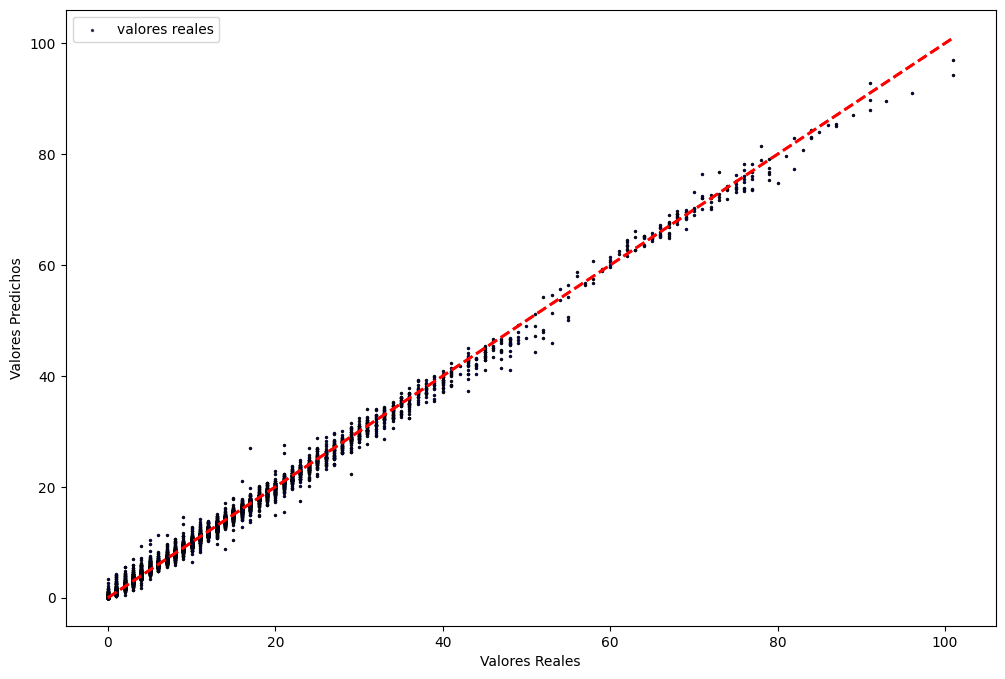

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label="valores reales", s=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

### 11. Modelo KNN - Cancelaciones

In [44]:
#Modelo KNN - Cancelaciones

#definimos variables independientes
features = ['hour_only', 'total_trenes', 'count_retraso',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

X = combined_data[features]
y_cancelaciones = combined_data['count_cancelled'] #total cancelaciones

#eliminamos filas con valores NaN
complete_data = pd.concat([X, y_cancelaciones], axis=1).dropna()
X = complete_data[features]
y_cancelaciones = complete_data['count_cancelled']

#division de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cancelaciones, test_size=0.2, random_state=42)

#normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#con GridSearchCV  buscamos hiperparametros para encontrar el mejor valor de K
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Mejor valor de K
best_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de K:", best_k)

#creamos nuestro modelo KNN con el mejor K encontrado
knn_model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn_model.fit(X_train_scaled, y_train)

#Predicimos en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

#Evaluación del modelo en el conjunto de prueba
print("MSE (KNN - Cancelaciones):", mean_squared_error(y_test, y_pred))
print("R2 (KNN - Cancelaciones):", r2_score(y_test, y_pred))


Mejor valor de K: 16
MSE (KNN - Cancelaciones): 2.8441800719677652
R2 (KNN - Cancelaciones): 0.30426678985110966


### 12. Analisis de Resultados

**Analisis Resultados**


KNN Cancelaciones

**MSE - 2.84**

En nuestro caso hemos obtenido un valor de 2.84 que es un valor relativamente bajo para el MSE, lo que sugiere que el modelo está haciendo un trabajo razonable en cuanto a la precisión obtenida de las prediciones hechas.


**R2 - 0.30**

Hemos obtenido un valor de 0.304  que sugiere un 30.4%  aprox. de la variabilidad en el número de cancelaciones, que se consigue explicar por las características del modelo.
Es un valor bajo, lo que muestra que nuestro modelo no esta capturando de manera eficaz la relacion entre las caracteristicas y nuestra variable objectivo: las cancelaciones de los trenes.


**Matriz de Correlaciones:**\
Observamos la correlación entre las variables independientes (características meteorológicas) y la variable objetivo (retrasos y cancelaciones para el modelo 2). Asi tendremos mas informacion con relacion a las variables que estan teniendo mas impacto tanto en los retrasos/cancelaciones.

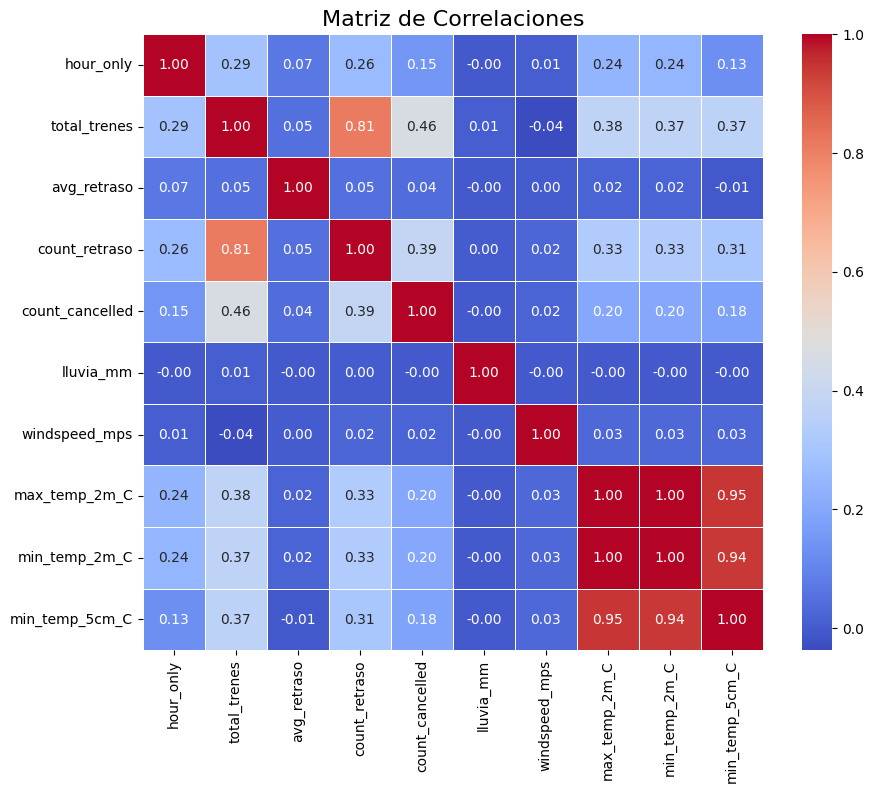

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#hay que revisar que solo se incluyan columnas numéricas  sin valores NaN
numeric_data = combined_data.select_dtypes(include=[float, int])
numeric_data = numeric_data.fillna(0) #reemplazamos nan con 0

#Hacemos el calculo de la matriz de correlación
corr_matrix = numeric_data.corr()

#Graficamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones', fontsize=16)
plt.show()

